### Ryeol try Auto ML
### 2022 - 08-11
### Python kernel : pycaret(Python 3.8.13)

In [1]:
from pycaret.regression import *
import pandas as pd

# 1018662 -> THE FIRST ONE

In [2]:
df1 = pd.read_csv("C:/Users/82108/OneDrive/바탕 화면/abcd/662/train1.csv", index_col = 0)
df1

,fw_1018683,fw_1019630,fw_1018683_t-1,fw_1019630_t-1,fw_1018683_t-2,fw_1019630_t-2,fw_1018683_t-3,fw_1019630_t-3,fw_1018683_t-4,fw_1019630_t-4,wl_1018662
ymdhm,,,,,,,,,,,
2014-05-01 0:40,305.01,849.91,249.50,911.07,206.48,958.36,249.84,1006.88,350.33,1056.61,326.7
2014-05-01 0:50,343.21,805.46,305.01,849.91,249.50,911.07,206.48,958.36,249.84,1006.88,325.7
2014-05-01 1:00,389.87,790.92,343.21,805.46,305.01,849.91,249.50,911.07,206.48,958.36,324.7
2014-05-01 1:10,466.35,790.92,389.87,790.92,343.21,805.46,305.01,849.91,249.50,911.07,322.7
2014-05-01 1:20,516.29,790.92,466.35,790.92,389.87,790.92,343.21,805.46,305.01,849.91,320.7
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 23:00,597.98,471.08,631.20,438.33,665.37,386.43,583.03,376.45,352.31,366.60,281.7
2022-05-31 23:10,575.57,493.58,597.98,471.08,631.20,438.33,665.37,386.43,583.03,376.45,279.7
2022-05-31 23:20,501.04,505.03,575.57,493.58,597.98,471.08,631.20,438.33,665.37,386.43,278.7


In [3]:
reg_test_1 = setup(data= df1, target='wl_1018662', train_size=0.8, fold=5, session_id = 1520, imputation_type='iterative', iterative_imputation_iters=10, categorical_iterative_imputer='rf',silent = True)

,Description,Value
0,session_id,1520
1,Target,wl_1018662
2,Original Data,"(136914, 11)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(109530, 1)"


In [4]:
best = compare_models(sort='RMSE', n_select=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,14.5336,525.0069,22.9091,0.9192,0.0645,0.0435,1.3880
knn,K Neighbors Regressor,13.8340,563.2618,23.7300,0.9133,0.0660,0.0404,0.0460
lightgbm,Light Gradient Boosting Machine,15.0566,595.2634,24.3934,0.9084,0.0651,0.0440,0.1380
rf,Random Forest Regressor,13.3488,610.6453,24.7091,0.9059,0.0678,0.0385,2.6560
et,Extra Trees Regressor,13.4531,664.0096,25.7668,0.8977,0.0701,0.0386,1.0480
dt,Decision Tree Regressor,14.1948,763.4380,27.6289,0.8824,0.0747,0.0407,0.0940
ada,AdaBoost Regressor,23.5510,936.0207,30.5872,0.8556,0.0887,0.0734,0.2960
ridge,Ridge Regression,32.2874,2335.7097,48.3273,0.6403,0.1481,0.0958,1.0360
br,Bayesian Ridge,32.2875,2335.7096,48.3273,0.6403,0.1481,0.0958,0.0140
omp,Orthogonal Matching Pursuit,32.2874,2335.7097,48.3273,0.6403,0.1481,0.0958,0.0120


In [5]:
best

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1520, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, m

In [6]:
gbr = create_model('gbr', fold=2)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.5995,535.5764,23.1425,0.9171,0.0649,0.0436
1,14.5022,516.5205,22.7271,0.9210,0.0642,0.0434
Mean,14.5508,526.0485,22.9348,0.9190,0.0646,0.0435
Std,0.0487,9.5280,0.2077,0.0019,0.0003,0.0001


In [7]:
rf = create_model('rf', fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.0737,639.2910,25.2842,0.9010,0.0697,0.0408
1,14.0912,635.9263,25.2176,0.9027,0.0698,0.0409
Mean,14.0825,637.6086,25.2509,0.9019,0.0697,0.0409
Std,0.0088,1.6824,0.0333,0.0008,0.0000,0.0001


In [8]:
lightgbm = create_model('lightgbm', fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.0909,608.0911,24.6595,0.9059,0.0655,0.0441
1,15.0793,587.9627,24.2479,0.9100,0.0649,0.0441
Mean,15.0851,598.0269,24.4537,0.9079,0.0652,0.0441
Std,0.0058,10.0642,0.2058,0.0021,0.0003,0.0000


In [9]:
knn = create_model('knn', fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.3931,582.2773,24.1304,0.9099,0.0673,0.0422
1,14.3987,572.5924,23.9289,0.9124,0.0671,0.0424
Mean,14.3959,577.4349,24.0297,0.9111,0.0672,0.0423
Std,0.0028,4.8425,0.1008,0.0013,0.0001,0.0001


In [10]:
tune_gbr = tune_model(gbr, optimize = 'RMSE', fold=2)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.6876,541.6342,23.2730,0.9162,0.0652,0.0438
1,14.6116,523.1401,22.8723,0.9199,0.0645,0.0437
Mean,14.6496,532.3872,23.0726,0.9181,0.0648,0.0437
Std,0.0380,9.2471,0.2004,0.0019,0.0003,0.0000


In [11]:
tune_rf = rf

In [12]:
tune_lightgbm = tune_model(lightgbm, optimize = 'RMSE', fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.0920,608.3740,24.6652,0.9058,0.0655,0.0441
1,15.0813,588.2064,24.2530,0.9100,0.0649,0.0441
Mean,15.0866,598.2902,24.4591,0.9079,0.0652,0.0441
Std,0.0054,10.0838,0.2061,0.0021,0.0003,0.0000


In [13]:
tune_knn = tune_model(knn, optimize = 'RMSE', fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.8098,545.0474,23.3462,0.9156,0.0655,0.0442
1,14.7333,527.7165,22.9721,0.9192,0.0650,0.0441
Mean,14.7715,536.3819,23.1592,0.9174,0.0652,0.0441
Std,0.0382,8.6654,0.1871,0.0018,0.0002,0.0000


In [14]:
evaluate_model(tune_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
evaluate_model(tune_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [16]:
evaluate_model(tune_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
evaluate_model(tune_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
predict_model(tune_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,14.9944,575.5730,23.9911,0.9121,0.0645,0.0440


,fw_1018683_t-4,wl_1018662,Label
0,248.479996,286.700012,287.580354
1,211.309998,275.700012,284.107097
2,235.820007,273.700012,285.884774
3,-892.809998,338.700012,360.150320
4,273.709991,286.700012,291.578083
...,...,...,...
27378,425.799988,313.700012,305.447364
27379,849.989990,339.700012,333.646388
27380,211.500000,291.700012,284.107097
27381,277.459991,287.700012,291.506765


In [19]:
predict_model(tune_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,14.5172,513.7994,22.6671,0.9215,0.0640,0.0434


,fw_1018683_t-4,wl_1018662,Label
0,248.479996,286.700012,287.997841
1,211.309998,275.700012,283.421851
2,235.820007,273.700012,286.259320
3,-892.809998,338.700012,358.755715
4,273.709991,286.700012,290.174925
...,...,...,...
27378,425.799988,313.700012,304.547480
27379,849.989990,339.700012,335.558329
27380,211.500000,291.700012,283.421851
27381,277.459991,287.700012,290.174925


In [20]:
predict_model(tune_knn)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,14.4420,513.5548,22.6617,0.9216,0.0640,0.0431


,fw_1018683_t-4,wl_1018662,Label
0,248.479996,286.700012,287.721313
1,211.309998,275.700012,284.806427
2,235.820007,273.700012,278.912781
3,-892.809998,338.700012,361.763824
4,273.709991,286.700012,297.040466
...,...,...,...
27378,425.799988,313.700012,303.551086
27379,849.989990,339.700012,328.551086
27380,211.500000,291.700012,285.636200
27381,277.459991,287.700012,294.806427


In [21]:
predict_model(tune_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,13.2347,598.5413,24.4651,0.9086,0.0672,0.0381


,fw_1018683_t-4,wl_1018662,Label
0,248.479996,286.700012,286.235334
1,211.309998,275.700012,279.500049
2,235.820007,273.700012,273.339122
3,-892.809998,338.700012,399.480012
4,273.709991,286.700012,292.092272
...,...,...,...
27378,425.799988,313.700012,297.225168
27379,849.989990,339.700012,330.487012
27380,211.500000,291.700012,294.086537
27381,277.459991,287.700012,288.206507


In [22]:
pd1 = pd.read_csv('C:/Users/82108/OneDrive/바탕 화면/abcd/662/pred1.csv', index_col = 0)

In [24]:
sb1 = predict_model(tune_gbr, data = pd1)
sb2 = predict_model(tune_knn, data = pd1)
sb3 = predict_model(tune_rf, data = pd1)
sb4 = predict_model(tune_lightgbm, data = pd1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,340.7972,123935.1228,352.0442,0.0000,5.8150,nan


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,340.7621,123916.2333,352.0174,0.0000,5.8148,nan


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,340.0099,123850.0935,351.9234,0.0000,5.8109,nan


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,341.1395,124512.2221,352.8629,0.0000,5.8155,nan


In [37]:
blender = blend_models(estimator_list=best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.2602,500.4717,22.3712,0.9192,0.0616,0.0389
1,13.4548,529.4878,23.0106,0.9182,0.0633,0.0393
2,13.3902,504.0579,22.4512,0.9243,0.0623,0.0392
3,13.1497,483.0246,21.9778,0.9240,0.0613,0.0388
4,13.4584,534.4764,23.1187,0.9214,0.0634,0.0392
Mean,13.3427,510.3037,22.5859,0.9214,0.0624,0.0391
Std,0.1202,19.1425,0.4239,0.0024,0.0009,0.0002


In [39]:
finalm = finalize_model(blender)
pred = predict_model(finalm, data = pd1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,340.4734,123876.2031,351.9605,0.0000,5.8135,nan


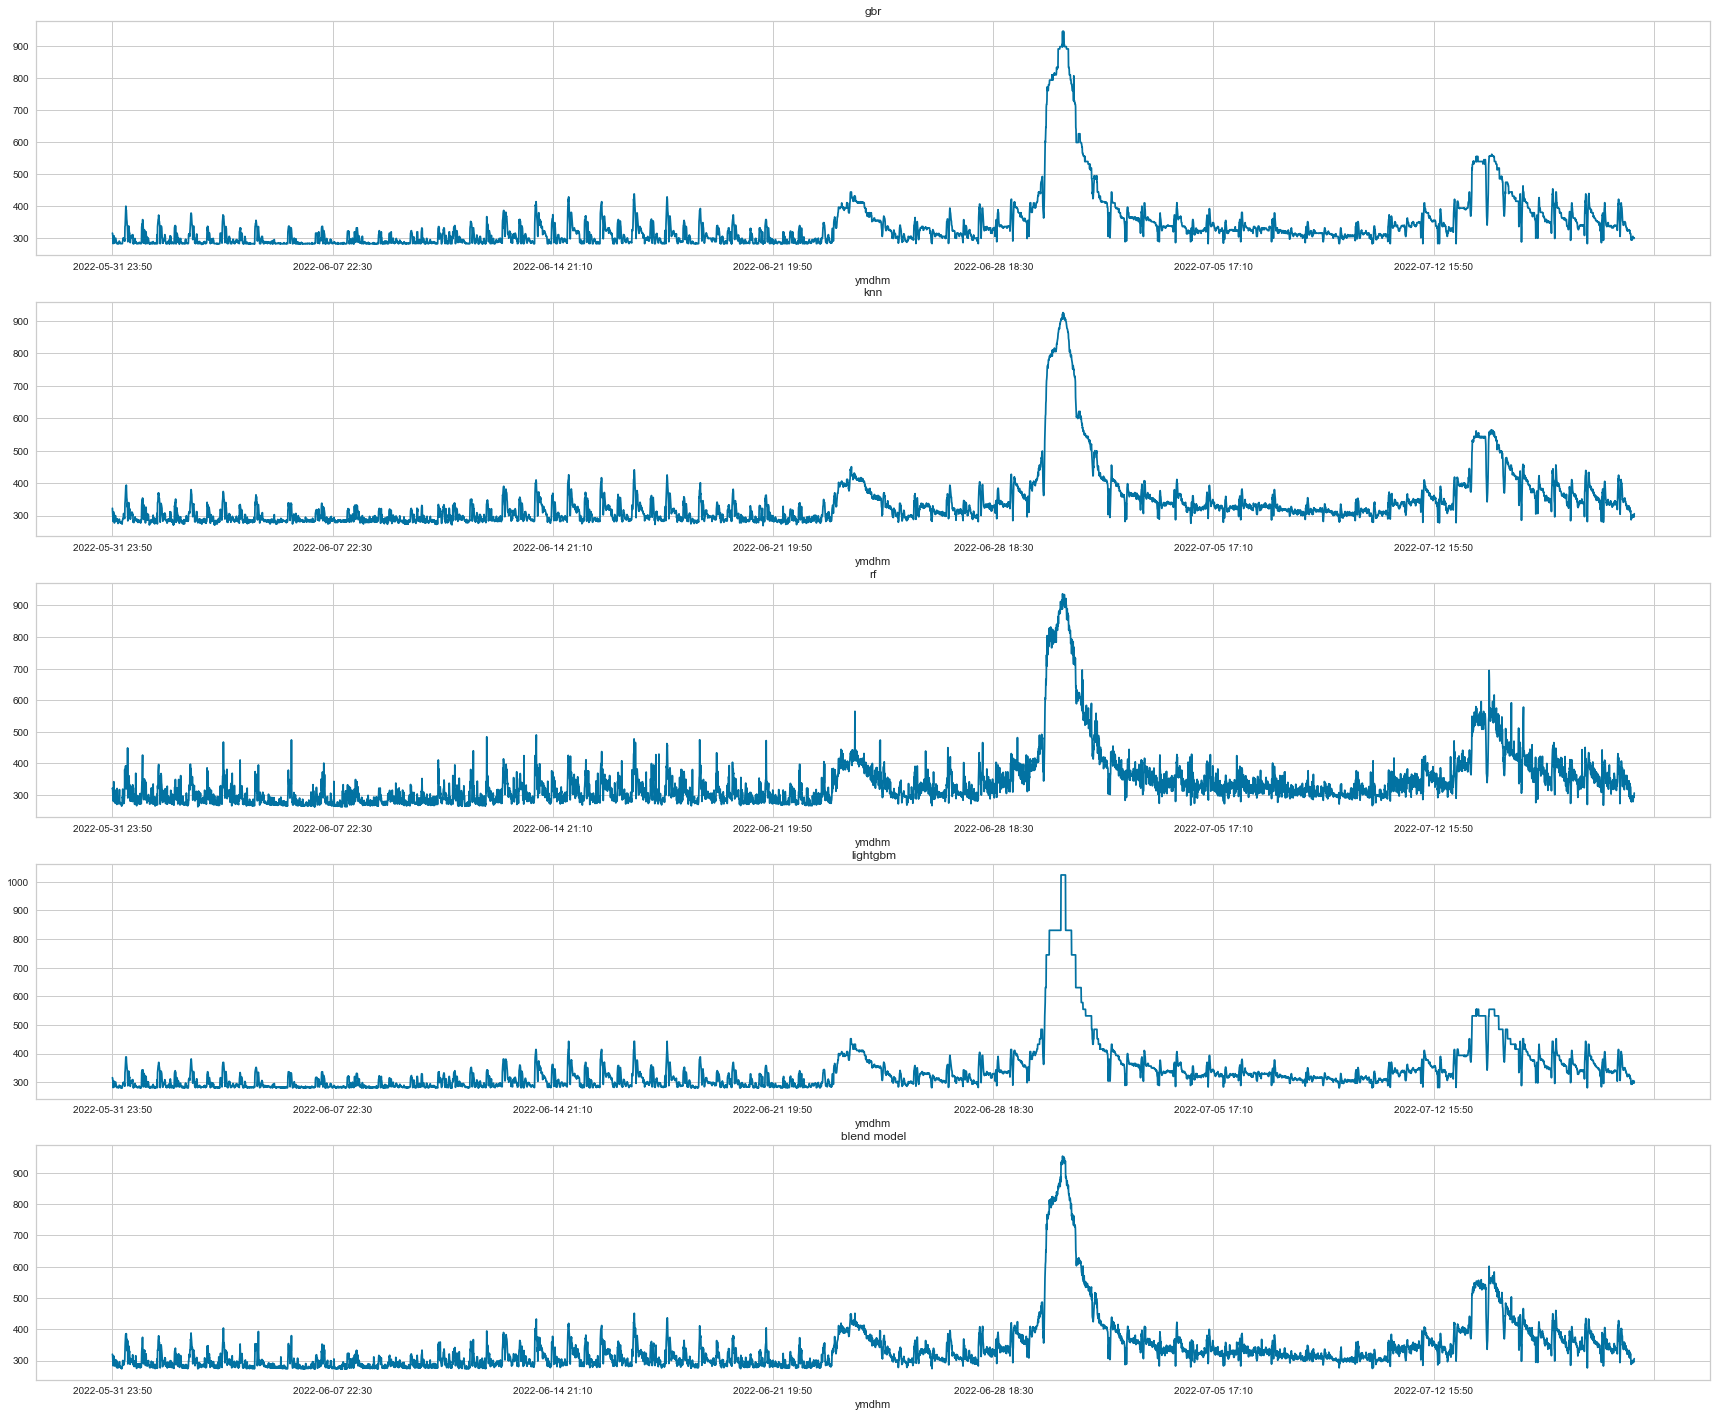

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 25))
ax1 = plt.subplot(5,1,1)
sb1["Label"].plot()
plt.title("gbr")
ax2 = plt.subplot(5,1,2)
sb2["Label"].plot()
plt.title("knn")
ax3 = plt.subplot(5,1,3)
sb3["Label"].plot()
plt.title("rf")
ax4 = plt.subplot(5,1,4)
sb4["Label"].plot()
plt.title("lightgbm")
ax5 = plt.subplot(5,1,5)
pred["Label"].plot()
plt.title("blend model")

plt.show()

In [16]:
sm10.to_csv("sm1.csv",columns=['Label'])

### wl_1018680 THE SECOND ONE

In [18]:
df2 = pd.read_csv("C:/Users/82108/OneDrive/바탕 화면/abcd/680/train2.csv", index_col = 0)
df2

,fw_1018683,fw_1019630,fw_1018683_t-1,fw_1019630_t-1,fw_1018683_t-2,fw_1019630_t-2,fw_1018683_t-3,fw_1019630_t-3,fw_1018683_t-4,fw_1019630_t-4,wl_1018680
ymdhm,,,,,,,,,,,
2014-05-01 0:40,305.01,849.91,249.50,911.07,206.48,958.36,249.84,1006.88,350.33,1056.61,314.2
2014-05-01 0:50,343.21,805.46,305.01,849.91,249.50,911.07,206.48,958.36,249.84,1006.88,312.2
2014-05-01 1:00,389.87,790.92,343.21,805.46,305.01,849.91,249.50,911.07,206.48,958.36,311.2
2014-05-01 1:10,466.35,790.92,389.87,790.92,343.21,805.46,305.01,849.91,249.50,911.07,309.2
2014-05-01 1:20,516.29,790.92,466.35,790.92,389.87,790.92,343.21,805.46,305.01,849.91,307.2
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 23:00,597.98,471.08,631.20,438.33,665.37,386.43,583.03,376.45,352.31,366.60,281.2
2022-05-31 23:10,575.57,493.58,597.98,471.08,631.20,438.33,665.37,386.43,583.03,376.45,279.2
2022-05-31 23:20,501.04,505.03,575.57,493.58,597.98,471.08,631.20,438.33,665.37,386.43,277.2


In [19]:
reg_test_2 = setup(data= df2, target='wl_1018680', train_size=0.8, fold=5, session_id = 1520,imputation_type='iterative', iterative_imputation_iters=10, categorical_iterative_imputer='lightgbm',silent = True)

,Description,Value
0,session_id,1520
1,Target,wl_1018680
2,Original Data,"(136914, 11)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(109530, 1)"


In [20]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15.1239,523.5306,22.8784,0.8998,0.0670,0.0469,1.0140
knn,K Neighbors Regressor,14.1710,552.9441,23.5130,0.8941,0.0678,0.0429,0.0380
lightgbm,Light Gradient Boosting Machine,15.5448,576.0777,23.9985,0.8897,0.0675,0.0474,0.1200
rf,Random Forest Regressor,13.5642,595.6532,24.4044,0.8859,0.0694,0.0405,2.1600
et,Extra Trees Regressor,13.6211,647.0376,25.4359,0.8761,0.0717,0.0405,0.8600
dt,Decision Tree Regressor,14.3673,743.7908,27.2711,0.8575,0.0764,0.0427,0.0800
ada,AdaBoost Regressor,23.6728,920.9284,30.3348,0.8239,0.0918,0.0768,0.2320
ridge,Ridge Regression,30.2708,2020.0728,44.9436,0.6132,0.1413,0.0934,0.7260
br,Bayesian Ridge,30.2709,2020.0727,44.9436,0.6132,0.1413,0.0934,0.0160
omp,Orthogonal Matching Pursuit,30.2708,2020.0727,44.9436,0.6132,0.1413,0.0934,0.0120


In [21]:
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1520, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
gbr2 = create_model('gbr', cross_validation=False)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.0813,505.6256,22.4861,0.904,0.0662,0.0469


In [23]:
best_tune2 = tune_model(gbr, optimize = 'RMSE', n_iter = 10)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.1660,526.1055,22.9370,0.8947,0.0669,0.0471
1,15.2297,540.5253,23.2492,0.8961,0.0677,0.0471
2,15.2008,522.1053,22.8496,0.9025,0.0671,0.0471
3,15.0419,501.8475,22.4020,0.9018,0.0661,0.0469
4,15.2675,547.5650,23.4001,0.8999,0.0680,0.0471
Mean,15.1812,527.6297,22.9676,0.8990,0.0672,0.0470
Std,0.0772,15.8825,0.3467,0.0031,0.0007,0.0001


In [24]:
best_tune

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=2,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1520, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
predict_model(best_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,20.0793,725.5470,26.9360,0.8622,0.0767,0.0627


,fw_1018683_t-4,wl_1018680,Label
0,248.479996,273.200012,287.997841
1,211.309998,274.200012,283.421851
2,235.820007,267.200012,286.259320
3,-892.809998,326.200012,358.755715
4,273.709991,275.200012,290.174925
...,...,...,...
27378,425.799988,328.200012,304.547480
27379,849.989990,321.200012,335.558329
27380,211.500000,277.200012,283.421851
27381,277.459991,275.200012,290.174925


In [27]:
pd2 = pd.read_csv('C:/Users/82108/OneDrive/바탕 화면/abcd/680/pred2.csv', index_col = 0)

In [28]:
sm2 = predict_model(best_tune, data= pd2)
sm2

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,340.7972,123935.1228,352.0442,0.0000,5.8150,nan


,fw_1018683,fw_1019630,fw_1018683_t-1,fw_1019630_t-1,fw_1018683_t-2,fw_1019630_t-2,fw_1018683_t-3,fw_1019630_t-3,fw_1018683_t-4,fw_1019630_t-4,wl_1018680,Label
ymdhm,,,,,,,,,,,,
2022-05-31 23:50,70.09,482.26,198.19,493.58,425.89,505.03,501.04,505.03,575.57,493.58,0,314.865945
2022-06-01 0:00,8.23,471.08,70.09,482.26,198.19,493.58,425.89,505.03,501.04,505.03,0,312.149856
2022-06-01 0:10,28.82,449.12,8.23,471.08,70.09,482.26,198.19,493.58,425.89,505.03,0,304.547480
2022-06-01 0:20,12.35,417.17,28.82,449.12,8.23,471.08,70.09,482.26,198.19,493.58,0,282.156589
2022-06-01 0:30,53.52,386.43,12.35,417.17,28.82,449.12,8.23,471.08,70.09,482.26,0,291.527964
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:00,25.27,926.70,329.00,865.00,337.81,805.46,354.49,706.48,379.51,552.17,0,298.993564
2022-07-18 23:10,-456.41,974.40,25.27,926.70,329.00,865.00,337.81,805.46,354.49,706.48,0,298.993564
2022-07-18 23:20,-717.30,1006.88,-456.41,974.40,25.27,926.70,329.00,865.00,337.81,805.46,0,298.191107


In [29]:
sm2.to_csv("sm2.csv",columns=['Label'])

# wl_1018683 THE THIRD ONE

In [30]:
df3 = pd.read_csv("C:/Users/82108/OneDrive/바탕 화면/abcd/683/train3.csv", index_col = 0)
df3

,fw_1018683,fw_1019630,fw_1018683_t-1,fw_1019630_t-1,fw_1018683_t-2,fw_1019630_t-2,fw_1018683_t-3,fw_1019630_t-3,fw_1018683_t-4,fw_1019630_t-4,wl_1018683
ymdhm,,,,,,,,,,,
2014-05-01 0:40,305.01,849.91,249.50,911.07,206.48,958.36,249.84,1006.88,350.33,1056.61,309.0
2014-05-01 0:50,343.21,805.46,305.01,849.91,249.50,911.07,206.48,958.36,249.84,1006.88,308.0
2014-05-01 1:00,389.87,790.92,343.21,805.46,305.01,849.91,249.50,911.07,206.48,958.36,307.0
2014-05-01 1:10,466.35,790.92,389.87,790.92,343.21,805.46,305.01,849.91,249.50,911.07,305.0
2014-05-01 1:20,516.29,790.92,466.35,790.92,389.87,790.92,343.21,805.46,305.01,849.91,303.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 23:00,597.98,471.08,631.20,438.33,665.37,386.43,583.03,376.45,352.31,366.60,278.0
2022-05-31 23:10,575.57,493.58,597.98,471.08,631.20,438.33,665.37,386.43,583.03,376.45,278.0
2022-05-31 23:20,501.04,505.03,575.57,493.58,597.98,471.08,631.20,438.33,665.37,386.43,277.0


In [31]:
reg_test_3 = setup(data= df3, target='wl_1018683', train_size=0.8, fold=5, session_id = 1520,imputation_type='iterative', iterative_imputation_iters=10, categorical_iterative_imputer='lightgbm',silent = True)

,Description,Value
0,session_id,1520
1,Target,wl_1018683
2,Original Data,"(136914, 11)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(109530, 1)"


In [32]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,14.4711,491.5737,22.1689,0.8915,0.0660,0.0455,1.0840
knn,K Neighbors Regressor,13.7804,523.8886,22.8865,0.8844,0.0673,0.0423,0.0400
lightgbm,Light Gradient Boosting Machine,14.8431,536.4921,23.1590,0.8816,0.0666,0.0459,0.1260
rf,Random Forest Regressor,13.2916,565.8761,23.7865,0.8750,0.0690,0.0403,2.4240
et,Extra Trees Regressor,13.3270,615.1575,24.8011,0.8642,0.0714,0.0402,0.9460
dt,Decision Tree Regressor,14.0221,704.0149,26.5319,0.8445,0.0759,0.0423,0.0740
ada,AdaBoost Regressor,22.3981,830.3632,28.8036,0.8166,0.0888,0.0737,0.2600
ridge,Ridge Regression,29.2525,1834.3560,42.8279,0.5951,0.1363,0.0919,0.0100
br,Bayesian Ridge,29.2525,1834.3560,42.8279,0.5951,0.1363,0.0919,0.0120
omp,Orthogonal Matching Pursuit,29.2525,1834.3561,42.8279,0.5951,0.1363,0.0919,0.0120


In [33]:
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1520, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
gbr = create_model('gbr', cross_validation=False)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14.4159,479.0382,21.8869,0.895,0.0654,0.0454


In [35]:
best_tune = tune_model(gbr, optimize = 'RMSE', n_iter = 10)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14.4868,492.8482,22.2002,0.8866,0.0658,0.0455
1,14.6159,507.3803,22.5251,0.8878,0.0667,0.0457
2,14.6106,492.2710,22.1872,0.8939,0.0664,0.0459
3,14.3353,468.4552,21.6438,0.8941,0.0651,0.0453
4,14.5389,511.5297,22.6170,0.8918,0.0669,0.0454
Mean,14.5175,494.4969,22.2347,0.8909,0.0662,0.0456
Std,0.1029,15.1125,0.3415,0.0031,0.0007,0.0002


In [36]:
best_tune

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=2,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1520, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
predict_model(best_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,14.4380,480.9255,21.9300,0.8946,0.0655,0.0454


,fw_1018683_t-4,wl_1018683,Label
0,248.479996,274.0,275.909369
1,211.309998,267.0,272.100410
2,235.820007,258.0,273.864853
3,-892.809998,322.0,340.528900
4,273.709991,274.0,278.956537
...,...,...,...
27378,425.799988,312.0,293.171964
27379,849.989990,317.0,322.650772
27380,211.500000,276.0,272.100410
27381,277.459991,275.0,278.956537


In [39]:
pd3 = pd.read_csv('C:/Users/82108/OneDrive/바탕 화면/abcd/683/pred3.csv', index_col = 0)

In [40]:
sm3 = predict_model(best_tune, data= pd3)
sm3

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,322.4949,109203.4870,330.4595,0.0000,5.7639,nan


,fw_1018683,fw_1019630,fw_1018683_t-1,fw_1019630_t-1,fw_1018683_t-2,fw_1019630_t-2,fw_1018683_t-3,fw_1019630_t-3,fw_1018683_t-4,fw_1019630_t-4,wl_1018683,Label
ymdhm,,,,,,,,,,,,
2022-05-31 23:50,70.09,482.26,198.19,493.58,425.89,505.03,501.04,505.03,575.57,493.58,0,303.218451
2022-06-01 0:00,8.23,471.08,70.09,482.26,198.19,493.58,425.89,505.03,501.04,505.03,0,299.651359
2022-06-01 0:10,28.82,449.12,8.23,471.08,70.09,482.26,198.19,493.58,425.89,505.03,0,293.171964
2022-06-01 0:20,12.35,417.17,28.82,449.12,8.23,471.08,70.09,482.26,198.19,493.58,0,270.551279
2022-06-01 0:30,53.52,386.43,12.35,417.17,28.82,449.12,8.23,471.08,70.09,482.26,0,276.429713
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:00,25.27,926.70,329.00,865.00,337.81,805.46,354.49,706.48,379.51,552.17,0,286.892256
2022-07-18 23:10,-456.41,974.40,25.27,926.70,329.00,865.00,337.81,805.46,354.49,706.48,0,286.892256
2022-07-18 23:20,-717.30,1006.88,-456.41,974.40,25.27,926.70,329.00,865.00,337.81,805.46,0,286.483747


In [41]:
sm3.to_csv("sm3.csv",columns=['Label'])

# wl_1019630 THE FOURTH ONE

In [42]:
df4 = pd.read_csv("C:/Users/82108/OneDrive/바탕 화면/abcd/630/train4.csv", index_col = 0)
df4

,fw_1018683,fw_1019630,fw_1018683_t-1,fw_1019630_t-1,fw_1018683_t-2,fw_1019630_t-2,fw_1018683_t-3,fw_1019630_t-3,fw_1018683_t-4,fw_1019630_t-4,wl_1019630
ymdhm,,,,,,,,,,,
2014-05-01 0:40,305.01,849.91,249.50,911.07,206.48,958.36,249.84,1006.88,350.33,1056.61,295.3
2014-05-01 0:50,343.21,805.46,305.01,849.91,249.50,911.07,206.48,958.36,249.84,1006.88,294.3
2014-05-01 1:00,389.87,790.92,343.21,805.46,305.01,849.91,249.50,911.07,206.48,958.36,294.3
2014-05-01 1:10,466.35,790.92,389.87,790.92,343.21,805.46,305.01,849.91,249.50,911.07,294.3
2014-05-01 1:20,516.29,790.92,466.35,790.92,389.87,790.92,343.21,805.46,305.01,849.91,294.3
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 23:00,597.98,471.08,631.20,438.33,665.37,386.43,583.03,376.45,352.31,366.60,271.3
2022-05-31 23:10,575.57,493.58,597.98,471.08,631.20,438.33,665.37,386.43,583.03,376.45,272.3
2022-05-31 23:20,501.04,505.03,575.57,493.58,597.98,471.08,631.20,438.33,665.37,386.43,272.3


In [43]:
reg_test_4 = setup(data= df4, target='wl_1019630', train_size=0.8, fold=5, session_id = 1520,imputation_type='iterative', iterative_imputation_iters=10, categorical_iterative_imputer='lightgbm',silent = True)

,Description,Value
0,session_id,1520
1,Target,wl_1019630
2,Original Data,"(136914, 11)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(109530, 1)"


In [44]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15.8870,539.3877,23.2231,0.8112,0.0732,0.0520,1.1100
lightgbm,Light Gradient Boosting Machine,16.1194,562.0756,23.7062,0.8033,0.0736,0.0523,0.1340
knn,K Neighbors Regressor,15.9589,582.5821,24.1354,0.7961,0.0756,0.0516,0.0460
rf,Random Forest Regressor,15.7654,627.3359,25.0453,0.7804,0.0775,0.0505,2.3820
et,Extra Trees Regressor,15.9948,682.2547,26.1182,0.7612,0.0803,0.0511,0.9700
dt,Decision Tree Regressor,16.7082,764.0400,27.6399,0.7326,0.0844,0.0533,0.0760
ada,AdaBoost Regressor,23.2906,844.9597,29.0247,0.7038,0.0939,0.0797,0.2920
ridge,Ridge Regression,26.1844,1330.7894,36.4793,0.5343,0.1196,0.0864,0.0120
br,Bayesian Ridge,26.1845,1330.7893,36.4793,0.5343,0.1196,0.0864,0.0120
omp,Orthogonal Matching Pursuit,26.1844,1330.7894,36.4793,0.5343,0.1196,0.0864,0.0140


In [45]:
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1520, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
gbr = create_model('gbr', cross_validation=False)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.8331,533.098,23.0889,0.8149,0.0727,0.0518


In [47]:
best_tune = tune_model(gbr, optimize = 'RMSE', n_iter = 10)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.9737,543.3388,23.3096,0.8022,0.0733,0.0523
1,16.0404,558.7064,23.6370,0.8054,0.0739,0.0523
2,15.9456,538.8487,23.2131,0.8146,0.0734,0.0522
3,15.7877,520.7670,22.8203,0.8140,0.0724,0.0519
4,15.8643,547.3632,23.3958,0.8158,0.0734,0.0517
Mean,15.9223,541.8048,23.2752,0.8104,0.0733,0.0521
Std,0.0879,12.4116,0.2673,0.0055,0.0005,0.0002


In [48]:
best_tune

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=2,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0005, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1520, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
evaluate_model(best_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [50]:
predict_model(best_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15.8235,533.8103,23.1043,0.8146,0.0728,0.0518


,fw_1018683_t-4,wl_1019630,Label
0,248.479996,262.299988,270.087569
1,211.309998,251.300003,266.998196
2,235.820007,254.300003,268.599374
3,-892.809998,328.299988,312.457353
4,273.709991,260.299988,273.761681
...,...,...,...
27378,425.799988,300.299988,284.678256
27379,849.989990,304.299988,311.498224
27380,211.500000,259.299988,266.998196
27381,277.459991,261.299988,273.761681


In [51]:
pd4 = pd.read_csv('C:/Users/82108/OneDrive/바탕 화면/abcd/630/pred4.csv', index_col = 0)

In [52]:
sm4 = predict_model(best_tune, data= pd4)
sm4

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,308.2044,98024.0044,313.0879,0.0000,5.7236,nan


,fw_1018683,fw_1019630,fw_1018683_t-1,fw_1019630_t-1,fw_1018683_t-2,fw_1019630_t-2,fw_1018683_t-3,fw_1019630_t-3,fw_1018683_t-4,fw_1019630_t-4,wl_1019630,Label
ymdhm,,,,,,,,,,,,
2022-05-31 23:50,70.09,482.26,198.19,493.58,425.89,505.03,501.04,505.03,575.57,493.58,0,294.067858
2022-06-01 0:00,8.23,471.08,70.09,482.26,198.19,493.58,425.89,505.03,501.04,505.03,0,293.291021
2022-06-01 0:10,28.82,449.12,8.23,471.08,70.09,482.26,198.19,493.58,425.89,505.03,0,284.678256
2022-06-01 0:20,12.35,417.17,28.82,449.12,8.23,471.08,70.09,482.26,198.19,493.58,0,266.143383
2022-06-01 0:30,53.52,386.43,12.35,417.17,28.82,449.12,8.23,471.08,70.09,482.26,0,268.035565
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:00,25.27,926.70,329.00,865.00,337.81,805.46,354.49,706.48,379.51,552.17,0,282.046924
2022-07-18 23:10,-456.41,974.40,25.27,926.70,329.00,865.00,337.81,805.46,354.49,706.48,0,282.046924
2022-07-18 23:20,-717.30,1006.88,-456.41,974.40,25.27,926.70,329.00,865.00,337.81,805.46,0,279.373028


In [53]:
sm4.to_csv("sm4.csv",columns=['Label'])

In [101]:
sample_submission = pd.read_csv("C:/Users/82108/OneDrive/바탕 화면/abcd/sample_submission.csv")

In [102]:
col1 = pd.DataFrame(sm1["Label"]).reset_index()
col2 = pd.DataFrame(sm2["Label"]).reset_index()
col3 = pd.DataFrame(sm3["Label"]).reset_index()
col4 = pd.DataFrame(sm4["Label"]).reset_index()

In [104]:
sample_submission["wl_1018662"] = col1["Label"]
sample_submission["wl_1018680"] = col2["Label"]
sample_submission["wl_1018683"] = col3["Label"]
sample_submission["wl_1019630"] = col4["Label"]

In [105]:
sample_submission

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,314.865945,314.865945,303.218451,294.067858
1,2022-06-01 00:10,312.149856,312.149856,299.651359,293.291021
2,2022-06-01 00:20,304.547480,304.547480,293.171964,284.678256
3,2022-06-01 00:30,282.156589,282.156589,270.551279,266.143383
4,2022-06-01 00:40,291.527964,291.527964,276.429713,268.035565
...,...,...,...,...,...
6907,2022-07-18 23:10,298.993564,298.993564,286.892256,282.046924
6908,2022-07-18 23:20,298.993564,298.993564,286.892256,282.046924
6909,2022-07-18 23:30,298.191107,298.191107,286.483747,279.373028
6910,2022-07-18 23:40,298.191107,298.191107,286.483747,278.586210


In [106]:
sample_submission.to_csv("submission_file.csv", index = False)

In [107]:
sample1 = sample_submission

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax1 = plt.subplot(4,1,1)
plt.plot(sample1["ymdhm"], sample1["wl_1018662"])
plt.title("wl_1018662")
ax2 = plt.subplot(4,1,2, sharey=ax1)
plt.plot(sample1["ymdhm"], sample1["wl_1018680"])
plt.title("wl_1018680")
ax3 = plt.subplot(4,1,3, sharey=ax1)
plt.plot(sample1["ymdhm"], sample1["wl_1018683"])
plt.title("wl_1018683")
ax3 = plt.subplot(4,1,4, sharey=ax1)
plt.plot(sample1["ymdhm"], sample1["wl_1019630"])
plt.title("wl_1019630")

plt.show()

Text(0.5, 1.0, 'wl_1019630')

Error in callback <function flush_figures at 0x0000019AB4BBC280> (for post_execute):


KeyboardInterrupt: 